In [ ]:
import numpy as np
from skimage.feature import hog
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


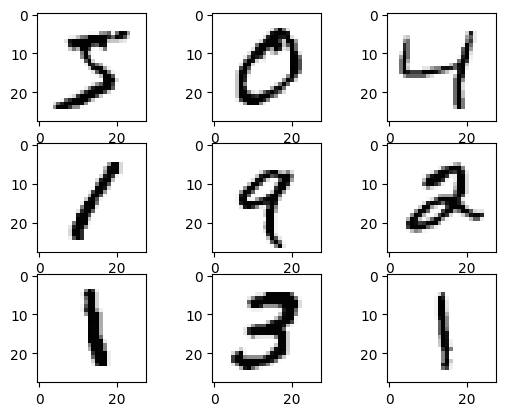

In [ ]:
plt.subplot(330 + 1 )
for i in range(9):
    img = x_train[i].reshape((28,28))
    plt.subplot(330 + 1+i  )
    plt.imshow(img, cmap="Greys")
plt.show()

In [ ]:
list_hog_fd = []
list_hog_fd_test = []
for feature in x_train:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(7, 7), cells_per_block=(2, 1), visualize=False)
    list_hog_fd.append(fd)

for feature in x_test:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(7,7), cells_per_block=(2, 1), visualize=False)
    list_hog_fd_test.append(fd)
hog_features = np.array(list_hog_fd, 'float64')
hog_features_test = np.array(list_hog_fd_test, 'float64')

x_train2,x_valid,y_train2,y_valid = train_test_split(hog_features,y_train,test_size=0.25)

In [ ]:
print(hog_features.shape)
print(hog_features_test.shape)

(60000, 216)
(10000, 216)


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.layers.serialization import activation
model = Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer = 'adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy',])


In [ ]:
model.fit(x_train2,y_train2,epochs=10,shuffle=True,validation_data=(x_valid,y_valid))

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8861 - val_loss: 0.1610 - val_accuracy: 0.9505
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1350 - accuracy: 0.9569 - val_loss: 0.1337 - val_accuracy: 0.9579
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1091 - accuracy: 0.9642 - val_loss: 0.1150 - val_accuracy: 0.9648
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0899 - accuracy: 0.9700 - val_loss: 0.1034 - val_accuracy: 0.9661
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0751 - accuracy: 0.9756 - val_loss: 0.1050 - val_accuracy: 0.9681
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0653 - accuracy: 0.9788 - val_loss: 0.1135 - val_accuracy: 0.9645
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0560 - accuracy: 0.9817 - val_loss: 0.1266 - val_accuracy:

In [ ]:
y_pred=model.predict(hog_features_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y=[np.argmax(x) for x in y_pred]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.96      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.94      0.96       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
print(confusion_matrix(y_test,y))

[[17278   440   251    98    51]
 [   86   450    14     2     4]
 [   28    20  1368    31     1]
 [   11     1     7   142     1]
 [   17     6    15     0  1570]]


In [ ]:
y_tr=y_train2[np.where((y_train2 == 9) | (y_train2 == 5))]
x_tr=x_train2[np.where((y_train2 == 9) | (y_train2 == 5))]

y_v=y_valid[np.where((y_valid == 9) | (y_valid == 5))]
x_v=x_valid[np.where((y_valid == 9) | (y_valid == 5))]

y_t=y_test[np.where((y_test == 9) | (y_test == 5))]
x_t=hog_features_test[np.where((y_test == 9) | (y_test == 5))]

In [ ]:
y_tr=[ 1 if x ==9 else 0 for x in y_tr]
y_v=[ 1 if x ==9 else 0 for x in y_v]
y_t=[ 1 if x ==9 else 0 for x in y_t]

In [ ]:
from keras.layers.serialization import activation
model = Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam', loss = keras.losses.mse, metrics = ['accuracy',])


In [ ]:
model.fit(x_tr, np.array(y_tr), validation_data=(x_v,np.array(y_v)), epochs=10)

Epoch 1/10
266/266 [==============================] - 2s 3ms/step - loss: 0.0237 - accuracy: 0.9787 - val_loss: 0.0115 - val_accuracy: 0.9854
Epoch 2/10
266/266 [==============================] - 1s 3ms/step - loss: 0.0047 - accuracy: 0.9942 - val_loss: 0.0078 - val_accuracy: 0.9882
Epoch 3/10
266/266 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9960 - val_loss: 0.0061 - val_accuracy: 0.9913
Epoch 4/10
266/266 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9969 - val_loss: 0.0038 - val_accuracy: 0.9955
Epoch 5/10
266/266 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9965 - val_loss: 0.0047 - val_accuracy: 0.9937
Epoch 6/10
266/266 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9971 - val_loss: 0.0039 - val_accuracy: 0.9948
Epoch 7/10
266/266 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9955
Epoch 

In [ ]:
y_p=model.predict(x_t)
y_p=[1 if x >0.5 else 0 for x in y_p]

60/60 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_t,y_p))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       892
           1       1.00      0.99      1.00      1009

    accuracy                           1.00      1901
   macro avg       1.00      1.00      1.00      1901
weighted avg       1.00      1.00      1.00      1901

